# Web Scraping

In [73]:
import requests
from bs4 import BeautifulSoup

urls = ["https://www.cnbctv18.com/economy/budget-24-gdp-gst-collection-fiscal-defecit-painting-a-picture-of-a-resilient-india-saurabh-m-deshmukh-18982831.htm","https://www.aljazeera.com/economy/2024/2/5/analysis-indias-2024-interim-budget-shows-a-changing-economy"]

text_arr = []
for i in urls :
    req = requests.get(i)
    soup = BeautifulSoup(req.content, "html.parser").get_text()
    text_arr.append(soup)
text_joined = '\n'.join(text_arr)
# text_joined

In [74]:
## removing \n from text

import re
text = re.sub(r"\n", "", text_joined)
# text

In [75]:
## Splitting total text into sentences

import re

match = r"\.[^\d]"
sentences = re.split(match, text)

# Model 1 :
##### https://huggingface.co/ahmedrachid/FinancialBERT-Sentiment-Analysis

### Importing libraries

In [76]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import pandas as pd

In [77]:
# !pip3 install torch torchvision torchaudio

### Loading the model

In [78]:
model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

In [79]:
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [80]:
results = nlp(sentences)
label = ['positive', 'negative', 'neutral']
score = [0,0,0]

for i in range(len(results)):
    if(results[i]['label'] == 'neutral'):
        score[2] += results[i]['score']
    elif(results[i]['label'] == 'positive'):
        score[0] += results[i]['score']
    elif(results[i]['label'] == 'negative'):
        score[1] += results[i]['score']

print(score)

[42.004330098629, 10.509154558181763, 32.8415145277977]


### Result
##### Plotting pie plot

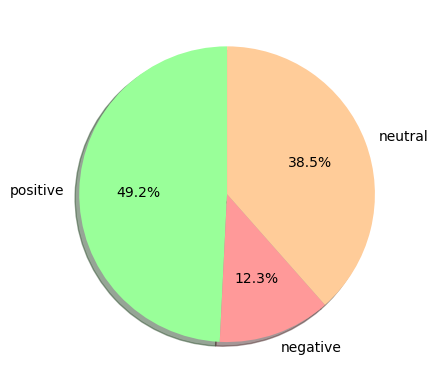

In [84]:
from matplotlib import pyplot as plt
import numpy as np
 
# Creating plot
fig = plt.figure()
colors = ['#99ff99','#ff9999','#ffcc99']
plt.pie(score, labels=label,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
 
# show plot
plt.show()

# Model 2 :
##### https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student

### Loading the model

In [85]:
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

In [1]:
### this model doesn't support sentences longer than 512, therefore we are splitting longer sentences

new_sentences = []
for s in sentences:
    if len(s) < 512:
        new_sentences.append(s)
    else:
        chunks = [s[i:i+511] for i in range(0, len(s), 511)]
# new_sentences

NameError: name 'sentences' is not defined

In [88]:

labels = ['positive', 'negative', 'neutral']
score = [0,0,0]
for i in new_sentences:
    result = distilled_student_sentiment_classifier(i)
    score[0] += result[0][0]['score']
    score[2] += result[0][1]['score']
    score[1] += result[0][2]['score']

### Result
##### Plotting pie plot

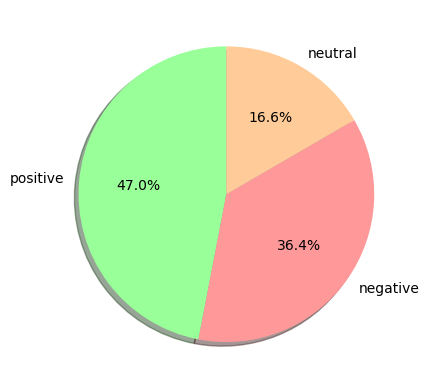

In [89]:
import matplotlib.pyplot as plt
plt.figure()
colors = ['#99ff99','#ff9999','#ffcc99']
plt.pie(score, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
plt.show()

# Conclusion
#### The sentiment analysis of both the models shows the dominance of positive sentiment by 47% - 50 % on 2024 Indian Budget.
#### The prediction of positive sentiments of both the models are pretty close..